<a href="https://colab.research.google.com/github/naveenrajan/Colab/blob/master/qn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import statsmodels.api as sm 

In [78]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
df=pd.read_excel('drive/My Drive/Eureka Forbes 10K Training Data.xlsx')

In [80]:
df=df.drop(['client_id','date','newUser'],axis=1)

In [81]:
#Country label encoding
df['country'] = df['country'].astype('category')
df['country'] = df['country'].cat.codes
df['country']=df['country'].astype(int)

#Device label encoding
df['device'] = df['device'].astype('category')
df['device'] = df['device'].cat.codes
df['device']=df['device'].astype(int)

#Region label encoding
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df['region']=df['region'].astype(int)


#sourceMedium label encoding
df['sourceMedium'] = df['sourceMedium'].astype('category')
df['sourceMedium'] = df['sourceMedium'].cat.codes
df['sourceMedium']=df['sourceMedium'].astype(int)



In [82]:
df.isna().sum()

DemoReqPg_CallClicks_evt_count                    0
air_purifier_page_top                             0
bounces                                           0
bounces_hist                                   4217
checkout_page_top                                 0
contactus_top                                     0
converted_in_7days                                0
country                                           0
customer_service_amc_login_top                    0
customer_service_request_login_top                0
demo_page_top                                     0
device                                            0
dsls                                              0
fired_DemoReqPg_CallClicks_evt                    0
fired_help_me_buy_evt                             0
fired_phone_clicks_evt                            0
goal4Completions                                  0
help_me_buy_evt_count                             0
help_me_buy_evt_count_hist                     4217
offer_page_t

In [83]:
hist_cols = [col for col in df.columns if 'hist' in col]
len(hist_cols)

18

In [84]:
df[hist_cols]

,bounces_hist,help_me_buy_evt_count_hist,pageviews_hist,paid_hist,phone_clicks_evt_count_hist,sessionDuration_hist,sessions_hist,visited_air_purifier_page_hist,visited_checkout_page_hist,visited_contactus_hist,visited_customer_service_amc_login_hist,visited_customer_service_request_login_hist,visited_demo_page_hist,visited_offer_page_hist,visited_security_solutions_page_hist,visited_storelocator_hist,visited_vacuum_cleaner_page_hist,visited_water_purifier_page_hist
0,1.0,0.0,14.0,0.0,0.0,1069.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,9.0,1.0,0.0,248.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,2.0,0.0,0.0,96.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,1.0,114.0,8.0,0.0,6980.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,8.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,0.0,1.0,5.0,1.0,0.0,181.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,bounces_hist,checkout_page_top,contactus_top,converted_in_7days,country,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,device,dsls,fired_DemoReqPg_CallClicks_evt,fired_help_me_buy_evt,fired_phone_clicks_evt,goal4Completions,help_me_buy_evt_count,help_me_buy_evt_count_hist,offer_page_top,pageviews,pageviews_hist,paid,paid_hist,phone_clicks_evt_count,phone_clicks_evt_count_hist,region,security_solutions_page_top,sessionDuration,sessionDuration_hist,sessions,sessions_hist,sourceMedium,storelocator_top,successbookdemo_top,vacuum_cleaner_page_top,visited_air_purifier_page,visited_air_purifier_page_hist,visited_checkout_page,visited_checkout_page_hist,visited_contactus,visited_contactus_hist,visited_customer_service_amc_login,visited_customer_service_amc_login_hist,visited_customer_service_request_login,visited_customer_service_request_login_hist,visited_demo_page,visited_demo_page_hist,visited_offer_page,visited_offer_page_hist,visited_security_solutions_page,visited_security_solutions_page_hist,visited_storelocator,visited_storelocator_hist,visited_successbookdemo,visited_vacuum_cleaner_page,visited_vacuum_cleaner_page_hist,visited_water_purifier_page,visited_water_purifier_page_hist,water_purifier_page_top
0,0.0,0.0,0.00000,0.004762,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045872,0.022453,0.0,0.000000,0.0,0.0,0.625000,0.0,0.009197,0.012021,0.000000,0.00431,0.369565,0.0,0.0,0.023853,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,1.0,0.05,0.0,0.000000,0.000000
1,0.0,0.0,0.00000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000862,0.5,0.033149,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.018349,NaN,1.0,NaN,0.0,NaN,0.375000,0.0,0.000613,NaN,0.000000,NaN,0.347826,0.0,0.0,0.000000,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.000000
2,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.005525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.036697,0.013817,1.0,0.038462,0.0,0.0,0.482143,0.0,0.014306,0.002780,0.000000,0.00000,0.347826,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.038462,0.015668
3,0.0,0.0,0.02381,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,1.0,0.0,0.0,0.142857,0.052632,0.521127,0.091743,0.001727,1.0,0.000000,0.0,0.0,0.482143,0.0,0.157470,0.001069,0.022727,0.00000,0.369565,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.000000,0.011806
4,0.0,0.0,0.02381,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,0.000000,0.027523,NaN,0.0,NaN,0.0,NaN,0.517857,0.0,0.179849,NaN,0.022727,NaN,0.000000,0.0,0.0,0.000000,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.000000


In [86]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [87]:
df.isna().sum()

DemoReqPg_CallClicks_evt_count                 0
air_purifier_page_top                          0
bounces                                        0
bounces_hist                                   0
checkout_page_top                              0
contactus_top                                  0
converted_in_7days                             0
country                                        0
customer_service_amc_login_top                 0
customer_service_request_login_top             0
demo_page_top                                  0
device                                         0
dsls                                           0
fired_DemoReqPg_CallClicks_evt                 0
fired_help_me_buy_evt                          0
fired_phone_clicks_evt                         0
goal4Completions                               0
help_me_buy_evt_count                          0
help_me_buy_evt_count_hist                     0
offer_page_top                                 0
pageviews           

In [88]:
df.corr()

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,bounces_hist,checkout_page_top,contactus_top,converted_in_7days,country,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,device,dsls,fired_DemoReqPg_CallClicks_evt,fired_help_me_buy_evt,fired_phone_clicks_evt,goal4Completions,help_me_buy_evt_count,help_me_buy_evt_count_hist,offer_page_top,pageviews,pageviews_hist,paid,paid_hist,phone_clicks_evt_count,phone_clicks_evt_count_hist,region,security_solutions_page_top,sessionDuration,sessionDuration_hist,sessions,sessions_hist,sourceMedium,storelocator_top,successbookdemo_top,vacuum_cleaner_page_top,visited_air_purifier_page,visited_air_purifier_page_hist,visited_checkout_page,visited_checkout_page_hist,visited_contactus,visited_contactus_hist,visited_customer_service_amc_login,visited_customer_service_amc_login_hist,visited_customer_service_request_login,visited_customer_service_request_login_hist,visited_demo_page,visited_demo_page_hist,visited_offer_page,visited_offer_page_hist,visited_security_solutions_page,visited_security_solutions_page_hist,visited_storelocator,visited_storelocator_hist,visited_successbookdemo,visited_vacuum_cleaner_page,visited_vacuum_cleaner_page_hist,visited_water_purifier_page,visited_water_purifier_page_hist,water_purifier_page_top
DemoReqPg_CallClicks_evt_count,1.000000,0.013159,0.003377,-0.017520,0.001388,-0.012716,0.032036,-0.023888,-0.011204,-0.008500,0.001514,0.045138,-0.006685,0.894364,-0.020668,0.008539,0.002890,-0.019292,-0.022059,-0.008498,-0.037201,-0.018784,0.082522,-0.000366,0.014314,0.022044,-0.028088,-0.002780,-0.037646,-0.025631,0.006391,-0.026718,0.022279,-0.007292,-0.003843,-0.017640,0.000720,0.000429,-0.010502,-0.020575,-0.024230,-0.019383,-0.026271,-0.020397,-0.018076,-0.011824,0.113661,0.039912,-0.016155,-0.004032,0.006821,-0.014894,-0.011921,-0.015267,0.005430,-0.027851,-0.022686,-0.058541,-0.033466,-0.027555
air_purifier_page_top,0.013159,1.000000,-0.014258,0.002314,0.008059,-0.002684,0.028226,-0.002926,0.006775,0.000625,-0.013614,-0.033425,0.008742,0.013482,0.015918,-0.006899,-0.004205,0.020734,-0.000195,0.030961,0.092736,0.024918,-0.036643,-0.005638,-0.006400,0.010102,0.000662,0.001374,0.100926,0.026688,-0.000593,0.015888,-0.019441,0.002660,-0.002620,0.004418,0.351132,0.111977,0.016894,0.022023,0.000254,-0.003000,0.007674,0.000861,0.004277,-0.000718,-0.037273,-0.018932,0.010388,0.006751,0.008671,0.001449,-0.002073,0.001228,-0.004581,0.014724,0.007106,0.033145,0.037371,0.032192
bounces,0.003377,-0.014258,1.000000,0.306311,-0.018305,-0.009917,0.001970,0.007845,-0.010104,-0.020394,0.154255,0.102888,-0.081457,0.007286,-0.036713,-0.021455,-0.006084,-0.029807,-0.039181,-0.005011,0.186519,0.017606,0.177371,0.091174,-0.017748,-0.002369,0.007212,0.003691,0.046296,-0.007463,0.925124,0.186782,0.046293,-0.008912,-0.006465,-0.019639,-0.024754,-0.034043,-0.033416,-0.046924,-0.041944,-0.025044,-0.058355,-0.028501,-0.039743,-0.022869,0.165996,0.268033,-0.037664,-0.030578,-0.007382,-0.010442,-0.020587,-0.012491,-0.001237,-0.050803,-0.033994,-0.084325,-0.062500,-0.013165
bounces_hist,-0.017520,0.002314,0.306311,1.000000,0.002992,-0.016275,0.022139,0.049628,0.011106,-0.007264,0.054766,0.027688,-0.073652,-0.023318,-0.028545,-0.029591,-0.017270,-0.020577,0.031897,0.019400,0.113036,0.397296,0.047975,0.361548,-0.027764,0.016567,0.009771,0.001322,0.074339,0.307302,0.334673,0.785124,0.039079,0.029173,-0.010552,0.034771,0.003143,0.125741,0.044830,0.199598,-0.026885,0.042485,-0.032927,0.095950,-0.024966,0.016243,0.009757,0.398704,0.034066,0.199135,0.003776,0.063809,0.020895,0.083230,-0.017907,0.047330,0.203742,0.027180,0.213710,0.052983
checkout_page_top,0.001388,0.008059,-0.018305,0.002992,1.000000,-0.004260,-0.004379,0.001907,-0.005945,-0.005374,-0.022531,-0.028591,-0.017879,-0.003474,0.023164,-0.006033,-0.007839,0.026135,0.005254,0.049826,0.231879,0.055006,-0.056009,0.022550,-0.003288,-0.003496,-0.005125,-0.000928,0.251168,0.059457,0.015692,0.035912,-0.019933,-0

In [89]:
df

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bounces,bounces_hist,checkout_page_top,contactus_top,converted_in_7days,country,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,device,dsls,fired_DemoReqPg_CallClicks_evt,fired_help_me_buy_evt,fired_phone_clicks_evt,goal4Completions,help_me_buy_evt_count,help_me_buy_evt_count_hist,offer_page_top,pageviews,pageviews_hist,paid,paid_hist,phone_clicks_evt_count,phone_clicks_evt_count_hist,region,security_solutions_page_top,sessionDuration,sessionDuration_hist,sessions,sessions_hist,sourceMedium,storelocator_top,successbookdemo_top,vacuum_cleaner_page_top,visited_air_purifier_page,visited_air_purifier_page_hist,visited_checkout_page,visited_checkout_page_hist,visited_contactus,visited_contactus_hist,visited_customer_service_amc_login,visited_customer_service_amc_login_hist,visited_customer_service_request_login,visited_customer_service_request_login_hist,visited_demo_page,visited_demo_page_hist,visited_offer_page,visited_offer_page_hist,visited_security_solutions_page,visited_security_solutions_page_hist,visited_storelocator,visited_storelocator_hist,visited_successbookdemo,visited_vacuum_cleaner_page,visited_vacuum_cleaner_page_hist,visited_water_purifier_page,visited_water_purifier_page_hist,water_purifier_page_top
0,0.0,0.00000,0.00000,0.004762,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045872,0.022453,0.0,0.000000,0.0,0.0,0.625000,0.0,0.009197,0.012021,0.000000,0.004310,0.369565,0.0,0.0,0.023853,0.0,0.000000,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0625,0.0,0.000000,0.0,0.000,0.0,1.0,0.05,0.0,0.000000,0.000000
1,0.0,0.00000,0.00000,0.000952,0.0,0.0,0.0,0.0,0.0,0.0,0.000862,0.5,0.033149,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.018349,0.004491,1.0,0.053846,0.0,0.0,0.375000,0.0,0.000613,0.000837,0.000000,0.003448,0.347826,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0875,0.0,0.0000,0.0,0.000000,0.0,0.000,0.0,0.0,0.00,0.0,0.007692,0.000000
2,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.5,0.005525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.036697,0.013817,1.0,0.038462,0.0,0.0,0.482143,0.0,0.014306,0.002780,0.000000,0.000000,0.347826,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0000,0.0,0.000000,0.0,0.000,0.0,0.0,0.00,1.0,0.038462,0.015668
3,0.0,0.00000,0.02381,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,1.0,0.0,0.0,0.142857,0.052632,0.521127,0.091743,0.001727,1.0,0.000000,0.0,0.0,0.482143,0.0,0.157470,0.001069,0.022727,0.000000,0.369565,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1.0,0.0000,0.0,0.000000,0.0,0.000,0.0,0.0,0.00,1.0,0.000000,0.011806
4,0.0,0.00000,0.02381,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.027523,0.011399,0.0,0.000000,0.0,0.0,0.517857,0.0,0.179849,0.005630,0.022727,0.001724,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.015385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0,0.000000,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.00000,0.00000,0.009524,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.052632,0.000000,0.201835,0.195164,1.0,0.307692,0.0,0.0,0.625000,0.0,0.255569,0.078553,0.000000,0.047414,0.347826,0.0,0.0,0.000000,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0625,0.0,0.333333,0.0,0.125,0.0,0.0,0.10,1.0,0.307692,0.205561
9996,0.0,0.00000,0.00000,0.006667,0.0,0.0,0.0,0.0,0.0,0.0,0.020074,0.5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.018349,0.011054,1.0,0.092308,0.0,0.0,0.928571,0.0,0.016554,0.007780,0.000000,0.012931,0.347826,0.0,0.0,0.000000,0.0,0.000000,0

In [90]:
df['intercept'] = 1.0

In [91]:
#list wise deletion along rows
X=df[['DemoReqPg_CallClicks_evt_count', 'air_purifier_page_top', 'bounces',
            'bounces_hist', 'checkout_page_top', 'contactus_top',
            'country', 'customer_service_amc_login_top',
            'customer_service_request_login_top', 'demo_page_top', 'device',
            'dsls', 'fired_DemoReqPg_CallClicks_evt', 'fired_help_me_buy_evt',
            'fired_phone_clicks_evt', 'goal4Completions', 'help_me_buy_evt_count',
            'help_me_buy_evt_count_hist', 'offer_page_top', 'pageviews',
            'pageviews_hist', 'paid', 'paid_hist', 'phone_clicks_evt_count',
            'phone_clicks_evt_count_hist', 'region', 'security_solutions_page_top',
            'sessionDuration', 'sessionDuration_hist', 'sessions', 'sessions_hist',
            'sourceMedium', 
            'storelocator_top', 
            #'successbookdemo_top',
            'vacuum_cleaner_page_top', 'visited_air_purifier_page',
            'visited_air_purifier_page_hist', 'visited_checkout_page',
            #'visited_checkout_page_hist', 
            #'visited_contactus',
            'visited_contactus_hist', 'visited_customer_service_amc_login',
            'visited_customer_service_amc_login_hist',
            'visited_customer_service_request_login',
            'visited_customer_service_request_login_hist', 'visited_demo_page',
            'visited_demo_page_hist', 'visited_offer_page',
            'visited_offer_page_hist', 'visited_security_solutions_page',
            'visited_security_solutions_page_hist', 'visited_storelocator',
            'visited_storelocator_hist', 'visited_successbookdemo',
            'visited_vacuum_cleaner_page', 'visited_vacuum_cleaner_page_hist',
            'visited_water_purifier_page', 'visited_water_purifier_page_hist',
            'water_purifier_page_top',
            'intercept'
            ]]

In [92]:
y=df['converted_in_7days']

In [93]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
ros = RandomOverSampler()

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))


Counter({0.0: 9947, 1.0: 9947})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [94]:
log_reg = sm.Logit(y_ros,X_ros).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.421126
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [95]:
print (log_reg.summary2())

                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.392     
Dependent Variable:     y                  AIC:                16869.7678
Date:                   2020-10-21 04:04   BIC:                17319.9637
No. Observations:       19894              Log-Likelihood:     -8377.9   
Df Model:               56                 LL-Null:            -13789.   
Df Residuals:           19837              LLR p-value:        0.0000    
Converged:              0.0000             Scale:              1.0000    
No. Iterations:         35.0000                                          
-------------------------------------------------------------------------
        Coef.     Std.Err.      z     P>|z|      [0.025         0.975]   
-------------------------------------------------------------------------
x1    -219.7883 2855560.0049  -0.0001 0.9999  -5597014.5537  5596574.9770
x2       9.7271       2.1248   4.5779 0.0000         5.5626       13

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.33, random_state=42)

In [98]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
clf.coef_

array([[-0.66978842,  0.28011111, -1.68896384,  1.65913012, -0.8762019 ,
         4.22287137,  0.85380572, -0.89899697, -0.24476777, -7.3270638 ,
         2.88805443, -1.31066117,  2.32170026, -1.69656894,  0.15146932,
        -0.286394  ,  6.60033822, -3.38785282, -1.87608344,  4.73007002,
        -0.877901  ,  0.47413365, -4.42212575,  1.99360269, -0.86170027,
        -0.48258553, -0.08478573,  1.47083322,  1.55447785,  1.01572078,
         4.71517416,  5.3034899 , -0.3951263 , -2.27452862, -3.11501698,
         5.35802619, -2.37193471, -2.27809947, -1.03757573,  0.25406638,
         1.13716742,  3.84745533,  0.22066752, 12.70556399, -0.24951117,
        -8.81986865, -2.58365002, -4.1144996 , -2.25158656, -2.37825726,
         2.51951723, -0.02299806,  0.02974866,  0.90212247,  3.16913632,
         2.86833803, -0.59153451]])

In [100]:
clf.intercept_

array([-4.36933541])

In [101]:
y_pred = clf.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81      3317
         1.0       0.81      0.80      0.80      3249

    accuracy                           0.81      6566
   macro avg       0.81      0.81      0.81      6566
weighted avg       0.81      0.81      0.81      6566



In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8067316478830339

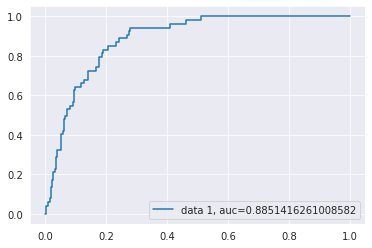

In [104]:
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [105]:
!pip install plot_metric

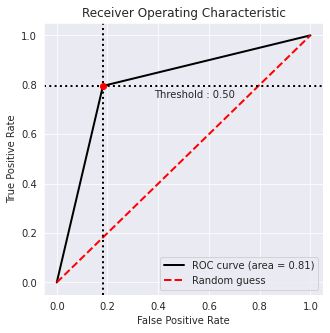

In [106]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()